In [1]:
import numpy as np
import pandas as pd

bank=pd.read_csv(r'C:\Users\Barghavi\Desktop\notes\HM-1(ML)\banks\bank-additional\bank-additional-full.csv')
bank.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [2]:
# checkig for null/missing values
print("IS there NULL Values")
bank.isnull().sum()

IS there NULL Values


age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [3]:
#Counting duplicate values and deleting them
print("NO of DUPLICATE Values",bank.duplicated().sum())
bank=pd.DataFrame.drop_duplicates(bank)
bank.duplicated().sum()

NO of DUPLICATE Values 12


0

In [4]:
bank.count()

age               41176
job               41176
marital           41176
education         41176
default           41176
housing           41176
loan              41176
contact           41176
month             41176
day_of_week       41176
duration          41176
campaign          41176
pdays             41176
previous          41176
poutcome          41176
emp.var.rate      41176
cons.price.idx    41176
cons.conf.idx     41176
euribor3m         41176
nr.employed       41176
y                 41176
dtype: int64

In [5]:
for column in bank.columns:
    print("COLUMN NAME = ",column)
    print(bank[column].value_counts())
    print("\n-------------------------------------------\n")

COLUMN NAME =  age
31    1947
32    1845
33    1833
36    1779
35    1758
      ... 
89       2
91       2
87       1
94       1
95       1
Name: age, Length: 78, dtype: int64

-------------------------------------------

COLUMN NAME =  job
admin.           10419
blue-collar       9253
technician        6739
services          3967
management        2924
retired           1718
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

-------------------------------------------

COLUMN NAME =  marital
married     24921
single      11564
divorced     4611
unknown        80
Name: marital, dtype: int64

-------------------------------------------

COLUMN NAME =  education
university.degree      12164
high.school             9512
basic.9y                6045
professional.course     5240
basic.4y                4176
basic.6y                2291
unknown                 1730
illiterate      

In [6]:
#Column Job -replacing job titles retired, student, unemployed, unknown with not_working
bank.replace(to_replace =["retired","student","unemployed"],  
                            value ="not_working",inplace=True)
bank["job"].replace({"unknown": "not_working"}, inplace=True)
bank["job"].value_counts()

admin.           10419
blue-collar       9253
technician        6739
services          3967
not_working       3937
management        2924
entrepreneur      1456
self-employed     1421
housemaid         1060
Name: job, dtype: int64

In [7]:
#Column Marital -replacing titles  divorced, unknown with single
bank.replace(to_replace =["divorced"],  
                            value ="single",inplace=True)
bank["marital"].replace({"unknown": "single"}, inplace=True)
bank["marital"].value_counts()

married    24921
single     16255
Name: marital, dtype: int64

In [8]:
#Column Education -modifying professional.course, university.degree to Degree_Holder;
#basic.4y, basic.6y, basic.9y, high school to  lower_secondaryEducation
#illiterate, unknown to illiterate

bank.replace(to_replace =["professional.course","university.degree"],  
                            value ="Degree_Holder",inplace=True)
bank.replace(to_replace =["basic.4y","basic.6y","basic.9y","high.school"],  
                            value ="lower_secondaryEducation",inplace=True)

bank["education"].replace({"unknown": "illiterate"}, inplace=True)
bank["education"].value_counts()

lower_secondaryEducation    22024
Degree_Holder               17404
illiterate                   1748
Name: education, dtype: int64

In [9]:
# Formating housing and loan columns as has_loan and droping
def have_a_loan(row, col_1, col_2):
    return 0 if (row[col_1] == 'no' or row[col_1] == 'unknown') and (row[col_2] == 'no' or row[col_2] == 'unknown') else 1 


bank['loan'] = bank.apply(lambda row: have_a_loan(row, 'housing', 'loan'),axis=1)

bank["loan"].value_counts()

1    24128
0    17048
Name: loan, dtype: int64

In [10]:
#Manual formating of target attribute to numerical labels

bank.y.replace(('yes', 'no'), (1, 0), inplace=True)
bank["y"].value_counts()

#Rename target variable as has_credit_subscribed

bank.rename(columns={'y': 'has_client_subscribed'}, inplace = True)

bank["has_client_subscribed"].value_counts()

0    36537
1     4639
Name: has_client_subscribed, dtype: int64

In [11]:
bank_updated=bank.copy()
bank_updated = bank_updated.drop(['housing', 'default'], axis = 1) 

In [12]:
category_columns = bank_updated.select_dtypes(include=['object']).columns
numerical_columns= bank_updated.select_dtypes(exclude=['object']).columns

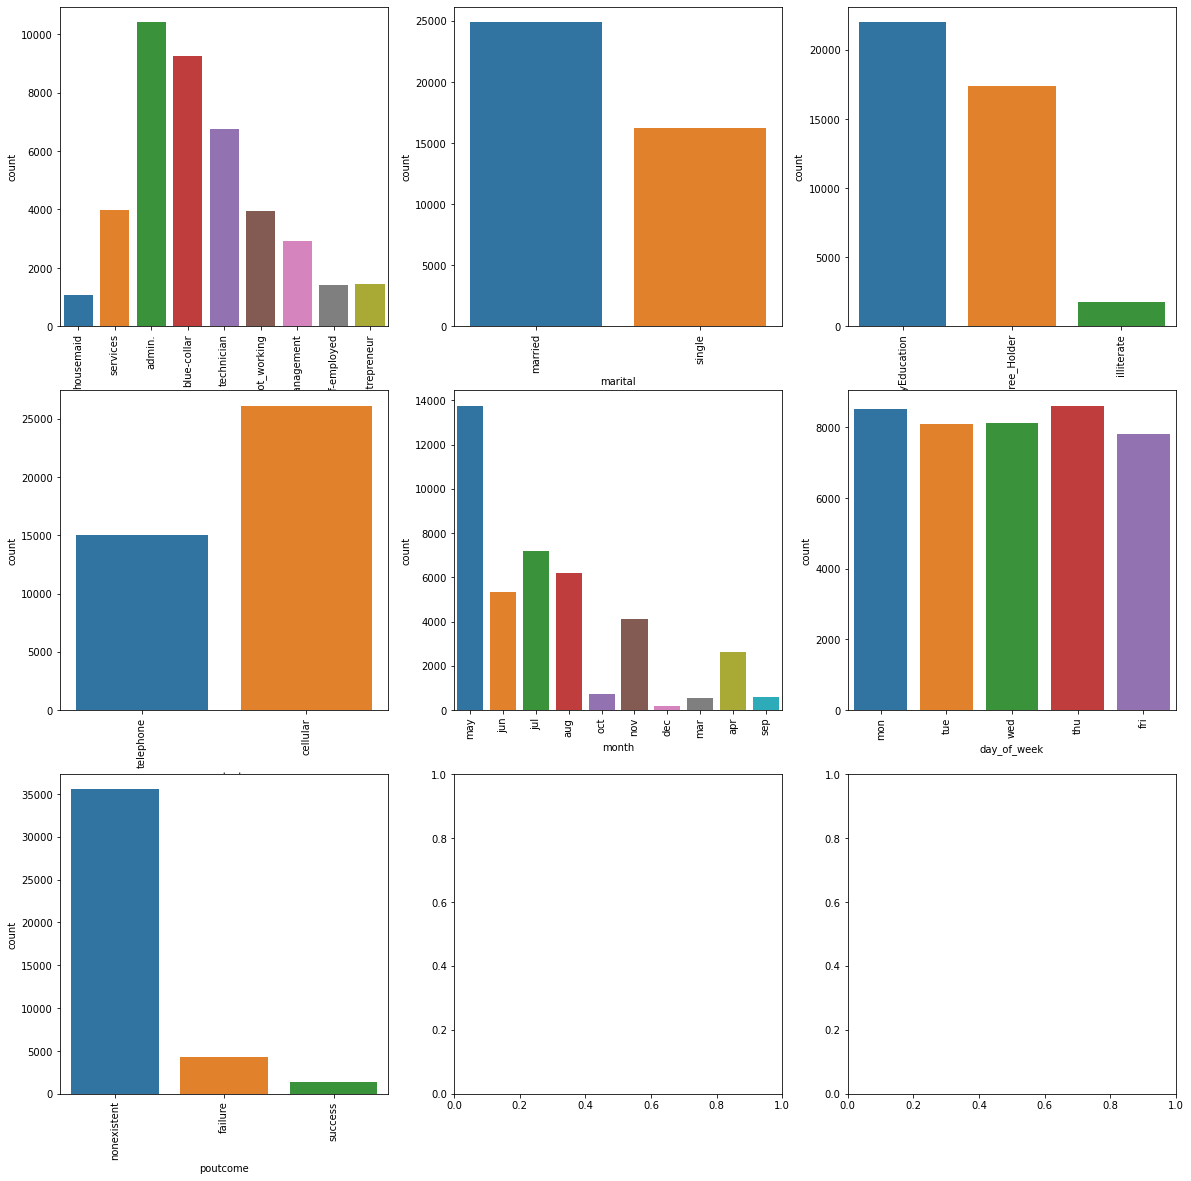

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns

fig, ax = plt.subplots(3, 3, figsize=(20, 20))
for var, subplot in zip(category_columns, ax.flatten()):
    sns.countplot(bank_updated[var], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

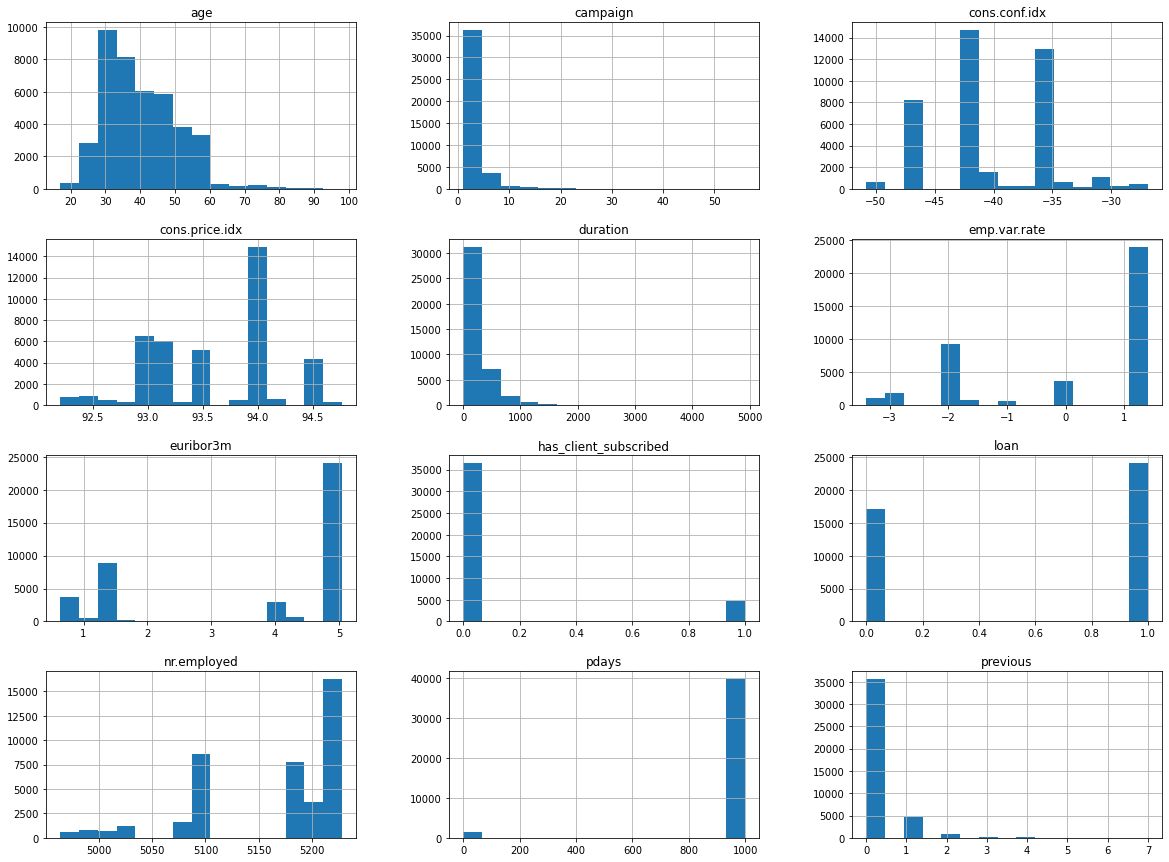

In [14]:
bank_updated[numerical_columns].hist(bins=15, figsize=(20, 15), layout=(4, 3));

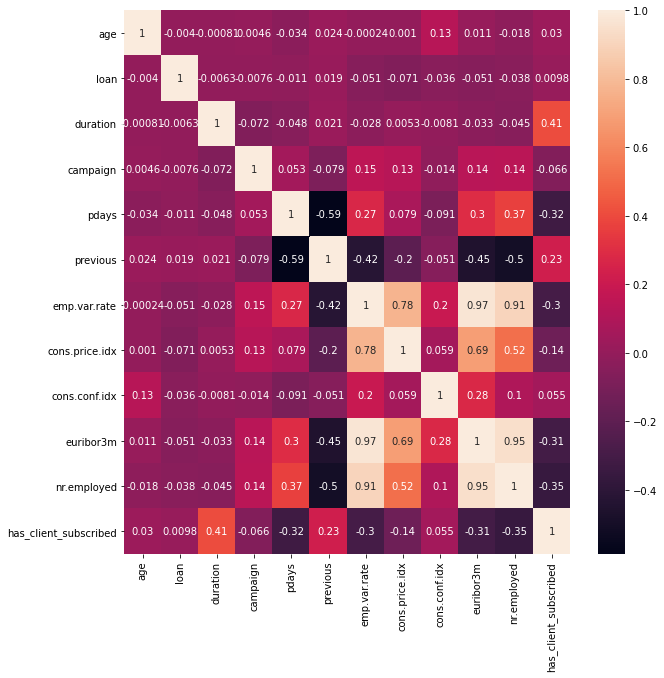

In [15]:
# Data-set high correlations
corrMatrix = bank.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corrMatrix, annot=True)
plt.show()

4639 of 41176 No of customers term_deposit and it is the 11.27% of the training set.
36537 of 41176  No of customers  did not deposited and it is the 88.73% of the training set.


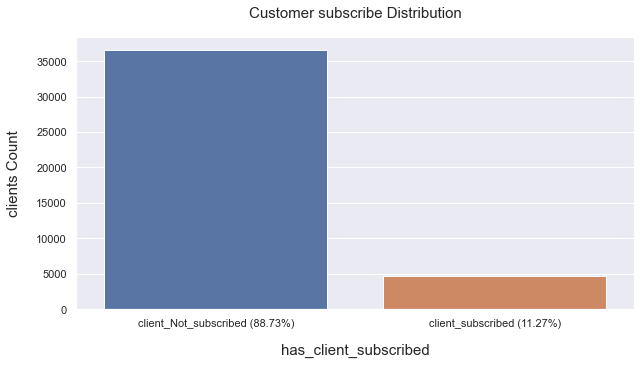

In [16]:
sns.set(style="darkgrid")

client_subscribed = bank_updated['has_client_subscribed'].value_counts()[1]
client_Not_subscribed = bank_updated['has_client_subscribed'].value_counts()[0]
client_subscribed_per = client_subscribed / bank_updated.shape[0] * 100
client_Not_subscribed_per = client_Not_subscribed / bank_updated.shape[0] * 100

print('{} of {} No of customers term_deposit and it is the {:.2f}% of the training set.'.format(client_subscribed, bank_updated.shape[0], client_subscribed_per))
print('{} of {}  No of customers  did not deposited and it is the {:.2f}% of the training set.'.format(client_Not_subscribed, bank_updated.shape[0], client_Not_subscribed_per))

plt.figure(figsize=(10, 5))
sns.countplot(bank_updated['has_client_subscribed'])


plt.xlabel('has_client_subscribed', size=15, labelpad=15)
plt.ylabel('clients Count', size=15, labelpad=15)
plt.xticks((0, 1), ['client_Not_subscribed ({0:.2f}%)'.format(client_Not_subscribed_per), 'client_subscribed ({0:.2f}%)'.format(client_subscribed_per)])

plt.title('Customer subscribe Distribution', size=15, y=1.05)

plt.show()

In [17]:
#Applying Onehotencoding and merging tables
bank_clean= pd.DataFrame()

for col in category_columns:
    
    val = [vals for vals in bank_updated[col].unique()]
    onehotcols = [col + '-' + str(s) for s in val]
    dummies_train = pd.get_dummies(bank_updated[col], prefix=col)
    bank_clean= pd.concat([bank_clean , dummies_train], axis=1)
    
bank_cleans = pd.concat([bank_clean,bank_updated[numerical_columns]], axis = 1)
bank_cleans.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_not_working,job_self-employed,job_services,job_technician,marital_married,...,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,has_client_subscribed
0,0,0,0,1,0,0,0,0,0,1,...,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
1,0,0,0,0,0,0,0,1,0,1,...,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
2,0,0,0,0,0,0,0,1,0,1,...,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
3,1,0,0,0,0,0,0,0,0,1,...,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
4,0,0,0,0,0,0,0,1,0,1,...,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0


In [18]:
print(bank_cleans.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41176 entries, 0 to 41187
Data columns (total 46 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   job_admin.                          41176 non-null  uint8  
 1   job_blue-collar                     41176 non-null  uint8  
 2   job_entrepreneur                    41176 non-null  uint8  
 3   job_housemaid                       41176 non-null  uint8  
 4   job_management                      41176 non-null  uint8  
 5   job_not_working                     41176 non-null  uint8  
 6   job_self-employed                   41176 non-null  uint8  
 7   job_services                        41176 non-null  uint8  
 8   job_technician                      41176 non-null  uint8  
 9   marital_married                     41176 non-null  uint8  
 10  marital_single                      41176 non-null  uint8  
 11  education_Degree_Holder             41176

In [19]:
# slitting X and target variables

X = bank_cleans[bank_cleans.columns[:-1]].values
y = bank_cleans['has_client_subscribed'].values

In [20]:
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.model_selection import cross_val_score

data={"Kfold":["Cv-1","Cv-2","Cv-3","Cv-4","Cv-5","Cv-6","Cv-7","Cv-8","Cv-9","Cv-10"]}
table_acc=pd.DataFrame(data,columns=["Kfold"])
acc_score=[]
ac_score=[]

cv=RepeatedKFold(n_splits=10,n_repeats=1,random_state=1)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X)
X_train

def main(X_train,y):
    classifiers = [
    KNeighborsClassifier(22),
    DecisionTreeClassifier(),
    GaussianNB(),
    RandomForestClassifier(),
    ExtraTreesClassifier()
        
    ]
    for clf in classifiers:
        name = clf.__class__.__name__
        print("\nModel classifier =  ",name)
        print('\n****Results****')
        clfN=cross_val_score(clf, X_train, y, cv=cv)
        table_acc[name]=clfN
        print("\nTen-fold cross validation score\n\n",clfN)
        acc=clfN.mean()
        acc_score.append(name)
        ac_score.append(acc)
        print("\nMean Accuracy - ",acc)
        print("\n------------------------------------------------------------------------------------------\n")
main(X_train,y)


Model classifier =   KNeighborsClassifier

****Results****

Ten-fold cross validation score

 [0.89922292 0.90335114 0.89898009 0.90602234 0.90602234 0.89023798
 0.89409764 0.90259898 0.90211319 0.89919845]

Mean Accuracy -  0.9001845072427985

------------------------------------------------------------------------------------------


Model classifier =   DecisionTreeClassifier

****Results****

Ten-fold cross validation score

 [0.89145216 0.89728023 0.88416707 0.89849441 0.88392424 0.88416707
 0.88000972 0.8911829  0.89021132 0.89094   ]

Mean Accuracy -  0.8891829126745936

------------------------------------------------------------------------------------------


Model classifier =   GaussianNB

****Results****

Ten-fold cross validation score

 [0.86959689 0.87858184 0.86644002 0.87396795 0.8703254  0.8703254
 0.86640758 0.87660918 0.86446442 0.87102259]

Mean Accuracy -  0.8707741258806431

---------------------------------------------------------------------------------------

In [21]:
from sklearn.svm import SVC

clf=SVC(kernel = 'linear', probability=True)
name = clf.__class__.__name__
print("\nModel classifier =  ",name)
print('\n****Results****')
clfN=cross_val_score(clf, X_train, y, cv=cv)
table_acc[name]=clfN
print("\nTen-fold cross validation score\n\n",clfN)
acc=clfN.mean()
acc_score.append(name)
ac_score.append(acc)
print("\nMean Accuracy - ",acc)
print("\n------------------------------------------------------------------------------------------\n")


Model classifier =   SVC

****Results****

Ten-fold cross validation score

 [0.90383681 0.91015056 0.89922292 0.90456532 0.90966489 0.89679456
 0.89895555 0.91085742 0.90599951 0.90624241]

Mean Accuracy -  0.9046289959906348

------------------------------------------------------------------------------------------



In [22]:
df=pd.DataFrame(columns=[acc_score])
df.loc["un-balanced"]=ac_score
df

,KNeighborsClassifier,DecisionTreeClassifier,GaussianNB,RandomForestClassifier,ExtraTreesClassifier,SVC
un-balanced,0.900185,0.889183,0.870774,0.913809,0.902832,0.904629


In [23]:
acc_score=[]
ac_score=[]

In [24]:
#UNDER-SAMPLING
from imblearn.under_sampling import NearMiss
from collections import Counter

rus = NearMiss()
X_train_underresampled, y_train_underresampled = rus.fit_sample(X_train, y)
print(Counter(y_train_underresampled).items())

dict_items([(0, 4639), (1, 4639)])


In [25]:
method="UNDER-SAMPLING"
main(X_train_underresampled, y_train_underresampled)


Model classifier =   KNeighborsClassifier

****Results****

Ten-fold cross validation score

 [0.80064655 0.80172414 0.82435345 0.83297414 0.77909483 0.80603448
 0.81788793 0.80280172 0.79072276 0.82416397]

Mean Accuracy -  0.8080403972770895

------------------------------------------------------------------------------------------


Model classifier =   DecisionTreeClassifier

****Results****

Ten-fold cross validation score

 [0.83405172 0.81788793 0.81896552 0.80603448 0.82866379 0.8125
 0.81681034 0.80387931 0.80151025 0.81445523]

Mean Accuracy -  0.8154758583491425

------------------------------------------------------------------------------------------


Model classifier =   GaussianNB

****Results****

Ten-fold cross validation score

 [0.73706897 0.74461207 0.75       0.75646552 0.74353448 0.75431034
 0.73491379 0.74568966 0.74002157 0.74433657]

Mean Accuracy -  0.7450952972138526

------------------------------------------------------------------------------------------

In [26]:
from sklearn.svm import SVC

clf=SVC(kernel = 'linear', probability=True)
name = clf.__class__.__name__
print("\nModel classifier =  ",name)
print('\n****Results****')
clfN=cross_val_score(clf, X_train_underresampled, y_train_underresampled, cv=cv)
table_acc[name]=clfN
print("\nTen-fold cross validation score\n\n",clfN)
acc=clfN.mean()
acc_score.append(name)
ac_score.append(acc)
print("\nMean Accuracy - ",acc)
print("\n------------------------------------------------------------------------------------------\n")


Model classifier =   SVC

****Results****

Ten-fold cross validation score

 [0.85237069 0.86206897 0.88038793 0.86530172 0.86314655 0.87068966
 0.87176724 0.85344828 0.85652643 0.8425027 ]

Mean Accuracy -  0.861821016069635

------------------------------------------------------------------------------------------



In [27]:
df_under=pd.DataFrame(columns=[acc_score])
df_under.loc["under-sampled"]=ac_score
df_under

,KNeighborsClassifier,DecisionTreeClassifier,GaussianNB,RandomForestClassifier,ExtraTreesClassifier,SVC
under-sampled,0.80804,0.815476,0.745095,0.86398,0.839191,0.861821


In [28]:
under_acc_scores=table_acc.copy()
under_acc_scores.loc['mean'] = under_acc_scores.mean()
under_acc_scores.loc['stdev'] = under_acc_scores.std()
under_acc_scores=under_acc_scores.round(decimals=4)
under_acc_scores

,Kfold,KNeighborsClassifier,DecisionTreeClassifier,GaussianNB,RandomForestClassifier,ExtraTreesClassifier,SVC
0,Cv-1,0.8006,0.8341,0.7371,0.8588,0.8384,0.8524
1,Cv-2,0.8017,0.8179,0.7446,0.8631,0.8373,0.8621
2,Cv-3,0.8244,0.8190,0.7500,0.8772,0.8491,0.8804
3,Cv-4,0.8330,0.8060,0.7565,0.8642,0.8448,0.8653
4,Cv-5,0.7791,0.8287,0.7435,0.8642,0.8319,0.8631
5,Cv-6,0.8060,0.8125,0.7543,0.8567,0.8254,0.8707
6,Cv-7,0.8179,0.8168,0.7349,0.8653,0.8405,0.8718
7,Cv-8,0.8028,0.8039,0.7457,0.8599,0.8319,0.8534
8,Cv-9,0.7907,0.8015,0.7400,0.8662,0.8479,0.8565
9,Cv-10,0.8242,0.8145,0.7443,0.8641,0.8447,0.8425


In [29]:
acc_score=[]
ac_score=[]

In [30]:
#OVER-SAMPLING using SMOTE.
from imblearn.over_sampling import SMOTE

ros = SMOTE(random_state=42)
X_train_overresampled, y_train_overresampled = ros.fit_sample(X_train, y)

print(Counter(y_train_overresampled).items())

dict_items([(0, 36537), (1, 36537)])


In [31]:
main(X_train_overresampled, y_train_overresampled)


Model classifier =   KNeighborsClassifier

****Results****

Ten-fold cross validation score

 [0.89792009 0.90175151 0.90120416 0.89764641 0.89448474 0.89256877
 0.90091693 0.89571644 0.89571644 0.89585329]

Mean Accuracy -  0.8973778770744835

------------------------------------------------------------------------------------------


Model classifier =   DecisionTreeClassifier

****Results****

Ten-fold cross validation score

 [0.9258347  0.92843459 0.92679256 0.92501368 0.92130833 0.92815109
 0.92828794 0.9299302  0.92774052 0.92965649]

Mean Accuracy -  0.9271150119675153

------------------------------------------------------------------------------------------


Model classifier =   GaussianNB

****Results****

Ten-fold cross validation score

 [0.72687466 0.72673782 0.73180077 0.72810619 0.71835226 0.71452032
 0.72396332 0.72149993 0.72136308 0.73162721]

Mean Accuracy -  0.7244845556393764

--------------------------------------------------------------------------------------

In [32]:
from sklearn.svm import SVC

clf=SVC(kernel = 'linear', probability=True)
name = clf.__class__.__name__
print("\nModel classifier =  ",name)
print('\n****Results****')
clfN=cross_val_score(clf, X_train_underresampled, y_train_underresampled, cv=cv)
table_acc[name]=clfN
print("\nTen-fold cross validation score\n\n",clfN)
acc=clfN.mean()
acc_score.append(name)
ac_score.append(acc)
print("\nMean Accuracy - ",acc)
print("\n------------------------------------------------------------------------------------------\n")


Model classifier =   SVC

****Results****

Ten-fold cross validation score

 [0.85237069 0.86206897 0.88038793 0.86530172 0.86314655 0.87068966
 0.87176724 0.85344828 0.85652643 0.8425027 ]

Mean Accuracy -  0.861821016069635

------------------------------------------------------------------------------------------



In [33]:
df_over=pd.DataFrame(columns=[acc_score])
df_over.loc["over-sampled"]=ac_score
df_over

,KNeighborsClassifier,DecisionTreeClassifier,GaussianNB,RandomForestClassifier,ExtraTreesClassifier,SVC
over-sampled,0.897378,0.927115,0.724485,0.957002,0.965008,0.861821


In [34]:
over_acc_scores=table_acc.copy()
over_acc_scores.loc['mean'] = over_acc_scores.mean()
over_acc_scores.loc['stdev'] = over_acc_scores.std()
over_acc_scores=over_acc_scores.round(decimals=4)
over_acc_scores

,Kfold,KNeighborsClassifier,DecisionTreeClassifier,GaussianNB,RandomForestClassifier,ExtraTreesClassifier,SVC
0,Cv-1,0.8979,0.9258,0.7269,0.9569,0.9651,0.8524
1,Cv-2,0.9018,0.9284,0.7267,0.9633,0.9693,0.8621
2,Cv-3,0.9012,0.9268,0.7318,0.9602,0.9677,0.8804
3,Cv-4,0.8976,0.9250,0.7281,0.9555,0.9602,0.8653
4,Cv-5,0.8945,0.9213,0.7184,0.9521,0.9637,0.8631
5,Cv-6,0.8926,0.9282,0.7145,0.9580,0.9641,0.8707
6,Cv-7,0.9009,0.9283,0.7240,0.9536,0.9663,0.8718
7,Cv-8,0.8957,0.9299,0.7215,0.9552,0.9626,0.8534
8,Cv-9,0.8957,0.9277,0.7214,0.9569,0.9644,0.8565
9,Cv-10,0.8959,0.9297,0.7316,0.9583,0.9665,0.8425


In [35]:
acc_score=[]
ac_score=[]

In [36]:
#BALANCE-SAMPLING
from imblearn.combine import SMOTEENN

rbs = SMOTEENN(random_state=0)
X_train_resampled, y_train_resampled = rbs.fit_sample(X_train, y)

print(Counter(y_train_resampled).items())

dict_items([(0, 31088), (1, 34439)])


In [37]:
main(X_train_resampled, y_train_resampled)


Model classifier =   KNeighborsClassifier

****Results****

Ten-fold cross validation score

 [0.95681367 0.95589806 0.95833969 0.95040439 0.9589501  0.95269342
 0.95406684 0.9545177  0.95558608 0.95558608]

Mean Accuracy -  0.9552856049117302

------------------------------------------------------------------------------------------


Model classifier =   DecisionTreeClassifier

****Results****

Ten-fold cross validation score

 [0.96215474 0.96230734 0.96535938 0.96429116 0.96047612 0.95757668
 0.96352816 0.96596459 0.96413309 0.96245421]

Mean Accuracy -  0.9628245468013512

------------------------------------------------------------------------------------------


Model classifier =   GaussianNB

****Results****

Ten-fold cross validation score

 [0.75186937 0.76651915 0.76056768 0.74195025 0.74881734 0.74011903
 0.75660003 0.74725275 0.75351038 0.75091575]

Mean Accuracy -  0.7518121727281654

--------------------------------------------------------------------------------------

In [39]:
from sklearn.svm import SVC

clf=SVC(kernel = 'linear', probability=True)
name = clf.__class__.__name__
print("\nModel classifier =  ",name)
print('\n****Results****')
clfN=cross_val_score(clf, X_train_resampled, y_train_resampled, cv=cv)
table_acc[name]=clfN
print("\nTen-fold cross validation score\n\n",clfN)
acc=clfN.mean()
acc_score.append(name)
ac_score.append(acc)
print("\nMean Accuracy - ",acc)
print("\n------------------------------------------------------------------------------------------\n")


Model classifier =   SVC

****Results****

Ten-fold cross validation score

 [0.94253092 0.94443387 0.94062797 0.94462417 0.94194899 0.94347164
 0.94784926 0.94461363 0.94537495 0.93661972]

Mean Accuracy -  0.9432095124298392

------------------------------------------------------------------------------------------



In [40]:
df_balance=pd.DataFrame(columns=[acc_score])
df_balance.loc["balance-sampled"]=ac_score
df_balance

,KNeighborsClassifier,DecisionTreeClassifier,GaussianNB,RandomForestClassifier,ExtraTreesClassifier,SVC
balance-sampled,0.955286,0.962825,0.751812,0.984068,0.993194,0.94321


In [41]:
balance_acc_scores=table_acc.copy()
balance_acc_scores.loc['mean'] = balance_acc_scores.mean()
balance_acc_scores.loc['stdev'] = balance_acc_scores.std()
balance_acc_scores=balance_acc_scores.round(decimals=4)
balance_acc_scores

,Kfold,KNeighborsClassifier,DecisionTreeClassifier,GaussianNB,RandomForestClassifier,ExtraTreesClassifier,SVC
0,Cv-1,0.9568,0.9622,0.7519,0.9847,0.9931,0.9425
1,Cv-2,0.9559,0.9623,0.7665,0.9843,0.9940,0.9444
2,Cv-3,0.9583,0.9654,0.7606,0.9843,0.9930,0.9406
3,Cv-4,0.9504,0.9643,0.7420,0.9849,0.9927,0.9446
4,Cv-5,0.9590,0.9605,0.7488,0.9826,0.9934,0.9419
5,Cv-6,0.9527,0.9576,0.7401,0.9834,0.9930,0.9435
6,Cv-7,0.9541,0.9635,0.7566,0.9825,0.9927,0.9478
7,Cv-8,0.9545,0.9660,0.7473,0.9849,0.9940,0.9446
8,Cv-9,0.9556,0.9641,0.7535,0.9846,0.9928,0.9454
9,Cv-10,0.9556,0.9625,0.7509,0.9846,0.9931,0.9366


In [42]:
df_final=pd.DataFrame(columns=[acc_score])
df_final = pd.concat([df_under,df,df_over,df_balance])
df_final=df_final.round(2)
df_final

,KNeighborsClassifier,DecisionTreeClassifier,GaussianNB,RandomForestClassifier,ExtraTreesClassifier,SVC
under-sampled,0.81,0.82,0.75,0.86,0.84,0.86
un-balanced,0.90,0.89,0.87,0.91,0.90,0.90
over-sampled,0.90,0.93,0.72,0.96,0.97,0.86
balance-sampled,0.96,0.96,0.75,0.98,0.99,0.94


In [43]:
balance_acc_scores=table_acc.copy()
balance_acc_scores.loc['mean'] = balance_acc_scores.mean()
balance_acc_scores.loc['stdev'] = balance_acc_scores.std()
balance_acc_scores

,Kfold,KNeighborsClassifier,DecisionTreeClassifier,GaussianNB,RandomForestClassifier,ExtraTreesClassifier,SVC
0,Cv-1,0.956814,0.962155,0.751869,0.984740,0.993133,0.942531
1,Cv-2,0.955898,0.962307,0.766519,0.984282,0.994049,0.944434
2,Cv-3,0.958340,0.965359,0.760568,0.984282,0.992980,0.940628
3,Cv-4,0.950404,0.964291,0.741950,0.984892,0.992675,0.944624
4,Cv-5,0.958950,0.960476,0.748817,0.982603,0.993438,0.941949
5,Cv-6,0.952693,0.957577,0.740119,0.983366,0.992980,0.943472
6,Cv-7,0.954067,0.963528,0.756600,0.982451,0.992675,0.947849
7,Cv-8,0.954518,0.965965,0.747253,0.984890,0.994048,0.944614
8,Cv-9,0.955586,0.964133,0.753510,0.984585,0.992827,0.945375
9,Cv-10,0.955586,0.962454,0.750916,0.984585,0.993132,0.936620


In [44]:
from scipy import stats

print("\nStatistical Difference for KNN and Decision tree\n\n",stats.ttest_rel(balance_acc_scores["KNeighborsClassifier"], balance_acc_scores["DecisionTreeClassifier"]))
print("\n---------------------------------------------")
print("\nStatistical Difference for KNN and GaussianNB\n\n",stats.ttest_rel(balance_acc_scores["KNeighborsClassifier"], balance_acc_scores["GaussianNB"]))
print("\n---------------------------------------------")
print("\nStatistical Difference for KNN and RandomForestClassifier\n\n",stats.ttest_rel(balance_acc_scores["KNeighborsClassifier"], balance_acc_scores["RandomForestClassifier"]))
print("\n---------------------------------------------")
print("\nStatistical Difference for KNN and ExtraTreesClassifier\n\n",stats.ttest_rel(balance_acc_scores["KNeighborsClassifier"], balance_acc_scores["ExtraTreesClassifier"]))
print("\n---------------------------------------------")
print("\nStatistical Difference for KNN and SVC\n\n",stats.ttest_rel(balance_acc_scores["KNeighborsClassifier"], balance_acc_scores["SVC"]))
print("\n---------------------------------------------")

print("\nStatistical Difference for DecisionTreeClassifier and GaussianNB\n\n",stats.ttest_rel(balance_acc_scores["DecisionTreeClassifier"], balance_acc_scores["GaussianNB"]))
print("\n---------------------------------------------")
print("\nStatistical Difference for DecisionTreeClassifier and RandomForestClassifier\n\n",stats.ttest_rel(balance_acc_scores["DecisionTreeClassifier"], balance_acc_scores["RandomForestClassifier"]))
print("\n---------------------------------------------")
print("\nStatistical Difference for DecisionTreeClassifier and ExtraTreesClassifier\n\n",stats.ttest_rel(balance_acc_scores["DecisionTreeClassifier"], balance_acc_scores["ExtraTreesClassifier"]))
print("\n---------------------------------------------")
print("\nStatistical Difference for DecisionTreeClassifier and SVC\n\n",stats.ttest_rel(balance_acc_scores["DecisionTreeClassifier"], balance_acc_scores["SVC"]))
print("\n---------------------------------------------")

print("\nStatistical Difference for GaussianNB and RandomForestClassifier\n\n",stats.ttest_rel(balance_acc_scores["GaussianNB"], balance_acc_scores["RandomForestClassifier"]))
print("\n---------------------------------------------")
print("\nStatistical Difference for GaussianNB and ExtraTreesClassifier\n\n",stats.ttest_rel(balance_acc_scores["GaussianNB"], balance_acc_scores["ExtraTreesClassifier"]))
print("\n---------------------------------------------")
print("\nStatistical Difference for GaussianNB and SVC\n\n",stats.ttest_rel(balance_acc_scores["GaussianNB"], balance_acc_scores["SVC"]))
print("\n---------------------------------------------")

print("\nStatistical Difference for RandomForestClassifier and ExtraTreesClassifier\n\n",stats.ttest_rel(balance_acc_scores["RandomForestClassifier"], balance_acc_scores["ExtraTreesClassifier"]))
print("\n---------------------------------------------")
print("\nStatistical Difference for RandomForestClassifier and SVC\n\n",stats.ttest_rel(balance_acc_scores["RandomForestClassifier"], balance_acc_scores["SVC"]))
print("\n---------------------------------------------")

print("\nStatistical Difference for ExtraTreesClassifier and SVC\n\n",stats.ttest_rel(balance_acc_scores["ExtraTreesClassifier"], balance_acc_scores["SVC"]))
print("\n---------------------------------------------")


Statistical Difference for KNN and Decision tree

 Ttest_relResult(statistic=-6.203564131705596, pvalue=6.682395315013638e-05)

---------------------------------------------

Statistical Difference for KNN and GaussianNB

 Ttest_relResult(statistic=10.641279751952723, pvalue=3.9591797442775923e-07)

---------------------------------------------

Statistical Difference for KNN and RandomForestClassifier

 Ttest_relResult(statistic=-9.962372860338341, pvalue=7.67670286533505e-07)

---------------------------------------------

Statistical Difference for KNN and ExtraTreesClassifier

 Ttest_relResult(statistic=-10.231302928446004, pvalue=5.880035098064623e-07)

---------------------------------------------

Statistical Difference for KNN and SVC

 Ttest_relResult(statistic=6.836080936558992, pvalue=2.8156166458424264e-05)

---------------------------------------------

Statistical Difference for DecisionTreeClassifier and GaussianNB

 Ttest_relResult(statistic=10.64185251232716, pvalue=3

In [46]:
#BALANCE-SAMPLING
from imblearn.combine import SMOTEENN

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X)
X_train

rbs = SMOTEENN(random_state=0)
X_resampled, y_resampled = rbs.fit_sample(X_train, y)

print(Counter(y_train_resampled).items())

dict_items([(0, 24860), (1, 27684)])


In [67]:
#Feature selection using SelectFromModel - 1
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

model_logistic = LogisticRegression(solver='saga', multi_class='multinomial', max_iter=10000, penalty='l1')
sel_model = SelectFromModel(estimator=model_logistic)
sfm= sel_model.fit_transform(X_train_resampled,y_train_resampled)
print(sel_model.get_support())

[ True  True  True  True False  True  True  True  True  True  True  True
 False  True  True  True False  True  True  True  True  True  True  True
  True  True  True  True  True False  True  True False False  True  True
  True  True  True  True  True  True  True  True  True]


In [76]:
from sklearn.pipeline import Pipeline

clf_rfc = RandomForestClassifier()
pipe = Pipeline([('feature_selection', sel_model), ('RandomForestClassifier', clf_rfc)])
pipe.fit(X_train_resampled, y_train_resampled)
pipe.score(X_test, y_test)
scores=cross_val_score(pipe,X_train_resampled,y_train_resampled,cv=cv)
score_rfc1 = scores.mean()
print("Mean Accuracies = ",score_rfc1)

Mean Accuracies =  0.9824337761596711


In [77]:
clf_etc=ExtraTreesClassifier()
pipe = Pipeline([('feature_selection', rfe), ('ExtraTreesClassifier', clf_etc)])
pipe.fit(X_train_resampled, y_train_resampled)
pipe.score(X_test, y_test)
scores=cross_val_score(pipe,X_train_resampled,y_train_resampled,cv=cv)
score_etc1=scores.mean()
print("Mean Accuracies = ",score_etc1)

Mean Accuracies =  0.9744975166399431


In [62]:
# SelectKBest: - 2
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

sel = SelectKBest(f_classif,k="all")

newx = sel.fit_transform(X_train_resampled,y_train_resampled)
print(newx[0:2])
print("\nUnivariate feature selection using ANOVA \n")
print(sel.get_support())

[[-0.58202419 -0.53838064 -0.19145912 -0.16255268 -0.27647866 -0.32514996
  -0.18906066  3.06261848 -0.44236939  0.80762686 -0.80762686 -0.85564118
  -0.21055635  0.93252174  0.75862492 -0.75862492 -0.26126209 -0.42006802
  -0.06663088 -0.45914    -0.38510675 -0.11592388 -0.70871734  3.00714596
  -0.13312267 -0.11847926 -0.48441993 -0.51048281  1.9436838  -0.49433173
  -0.49615677 -0.33934563  0.39777305 -0.18572799 -1.05789011  0.8405742
   0.70452239  0.51695793  0.19544346 -0.34955143 -0.11580987 -0.64910011
  -0.32350911  0.26216696  0.39813061]
 [-0.58202419 -0.53838064 -0.19145912  6.151852   -0.27647866 -0.32514996
  -0.18906066 -0.32651798 -0.44236939 -1.23819557  1.23819557 -0.85564118
  -0.21055635  0.93252174  0.75862492 -0.75862492  3.82757405 -0.42006802
  -0.06663088 -0.45914    -0.38510675 -0.11592388 -0.70871734 -0.33254122
  -0.13312267 -0.11847926 -0.48441993  1.95892981 -0.51448698 -0.49433173
  -0.49615677  2.94684805 -2.51399638 -0.18572799 -0.67403333  0.8405742
 

In [78]:
from sklearn.pipeline import Pipeline

clf_rfc = RandomForestClassifier()
pipe = Pipeline([('feature_selection', sel), ('RandomForestClassifier', clf_rfc)])
pipe.fit(X_train_resampled, y_train_resampled)
pipe.score(X_test, y_test)
scores=cross_val_score(pipe,X_train_resampled,y_train_resampled,cv=cv)
score_rfc2 = scores.mean()
print("Mean Accuracies = ",score_rfc2)

Mean Accuracies =  0.9839181963486114


In [79]:
clf_etc=ExtraTreesClassifier()
pipe = Pipeline([('feature_selection', sel), ('ExtraTreesClassifier', clf_etc)])
pipe.fit(X_train_resampled, y_train_resampled)
pipe.score(X_test, y_test)
scores=cross_val_score(pipe,X_train_resampled,y_train_resampled,cv=cv)
score_etc2=scores.mean()
print("Mean Accuracies = ",score_etc2)

Mean Accuracies =  0.9930153782519738


In [81]:
ba = pd.DataFrame(columns=["RandomForestClassifier","ExtraTreesClassifier"])
ba_actual=[]
ba_actual.append(0.984068)
ba_actual.append(0.993197)
ba_sel_1=[]
ba_sel_1.append(score_rfc1)
ba_sel_1.append(score_etc1)
ba_sel_2=[]
ba_sel_2.append(score_rfc2)
ba_sel_2.append(score_etc2)
ba.loc["actual"]=ba_actual
ba.loc["Fselection-1"]=ba_sel_1
ba.loc["Fselection-2"]=ba_sel_2
ba

,RandomForestClassifier,ExtraTreesClassifier
actual,0.984068,0.993197
Fselection-1,0.982434,0.974498
Fselection-2,0.983918,0.993015


In [143]:
import numpy as np
import pandas as pd

labour_relations = pd.read_excel(r"C:\Users\Barghavi\Desktop\notes\HM-2(ML)\labour.xlsx")  
labour_relations.head()

,dur,wage1,wage2,wage3,cola,hours,pension,stby_pay,shift_diff,educ_allw,holidays,vacation,lngtrm_disabil,dntl_ins,bereavement,empl_hplan,class
0,1,5.0,?,?,?,40,?,?,2,?,11,average,?,?,yes,?,good
1,2,4.5,5.8,?,?,35,ret_allw,?,?,yes,11,below average,?,full,?,full,good
2,?,?,?,?,?,38,empl_contr,?,5,?,11,generous,yes,half,yes,half,good
3,3,3.7,4.0,5.0,tc,?,?,?,?,yes,?,?,?,?,yes,?,good
4,3,4.5,4.5,5.0,?,40,?,?,?,?,12,average,?,half,yes,half,good


In [144]:
#Counting duplicate values and deleting them
print("NO of DUPLICATE Values",labour_relations.duplicated().sum())
labour_relations=pd.DataFrame.drop_duplicates(labour_relations)
print("After deleting dupluvates",labour_relations.duplicated().sum())

NO of DUPLICATE Values 0
After deleting dupluvates 0


In [145]:
for column in labour_relations.columns:
    print("COLUMN NAME = ",column)
    print(labour_relations[column].value_counts())
    print("\n-------------------------------------------\n")

COLUMN NAME =  dur
2    17
3    13
1     9
?     1
Name: dur, dtype: int64

-------------------------------------------

COLUMN NAME =  wage1
2.0    8
4.5    7
3.0    4
3.5    4
4.0    3
2.8    2
2.5    2
5.0    2
5.7    1
4.3    1
?      1
6.9    1
6.4    1
3.7    1
2.1    1
6.0    1
Name: wage1, dtype: int64

-------------------------------------------

COLUMN NAME =  wage2
?      10
4.0     9
2.5     5
5.0     3
2.0     3
4.5     3
3.0     2
4.4     1
7.0     1
4.8     1
5.8     1
6.4     1
Name: wage2, dtype: int64

-------------------------------------------

COLUMN NAME =  wage3
?      28
5.0     4
2.0     2
4.6     2
2.3     1
2.5     1
5.1     1
2.1     1
Name: wage3, dtype: int64

-------------------------------------------

COLUMN NAME =  cola
?       16
none    14
tc       6
tcf      4
Name: cola, dtype: int64

-------------------------------------------

COLUMN NAME =  hours
40    16
38     8
35     5
37     4
?      3
36     2
33     1
27     1
Name: hours, dtype: int64

-

In [146]:
labour_relations.dtypes

dur               object
wage1             object
wage2             object
wage3             object
cola              object
hours             object
pension           object
stby_pay          object
shift_diff        object
educ_allw         object
holidays          object
vacation          object
lngtrm_disabil    object
dntl_ins          object
bereavement       object
empl_hplan        object
class             object
dtype: object

In [147]:
# changing all unkowns to Nan
from numpy import nan

labour_relations = labour_relations.replace('?', nan)

In [148]:
# changing Datatypes appropriately 
from numpy import int64

labour_relations['wage1'] = labour_relations['wage1'].astype(float)
labour_relations['wage2'] = labour_relations['wage2'].astype(float)
labour_relations['wage3'] = labour_relations['wage3'].astype(float)
labour_relations['shift_diff'] = labour_relations['shift_diff'].astype(float)
labour_relations['dur'] = labour_relations['dur'].astype(float)
labour_relations['hours'] = labour_relations['hours'].astype(float)
labour_relations['holidays'] = labour_relations['holidays'].astype(float)
labour_relations['stby_pay'] = labour_relations['stby_pay'].astype(float)
labour_relations = labour_relations.round(decimals = 2)
labour_relations.dtypes

dur               float64
wage1             float64
wage2             float64
wage3             float64
cola               object
hours             float64
pension            object
stby_pay          float64
shift_diff        float64
educ_allw          object
holidays          float64
vacation           object
lngtrm_disabil     object
dntl_ins           object
bereavement        object
empl_hplan         object
class              object
dtype: object

In [149]:
# changing unknowns in potential numerical features to mean values of columns

labour_relations['wage1'] = labour_relations['wage1'].fillna(labour_relations['wage1'].mean())
labour_relations['wage2'] = labour_relations['wage2'].fillna(labour_relations['wage2'].mean())
labour_relations['shift_diff'] = labour_relations['shift_diff'].fillna(labour_relations['shift_diff'].mean())
labour_relations['dur'] = labour_relations['dur'].fillna(labour_relations['dur'].mean())


In [150]:
# changing unknowns in potential numerical and categorical features to mode values of columns
import statistics 

labour_relations['hours']=labour_relations['hours'].fillna(statistics.mode(labour_relations['hours']))
labour_relations['holidays']=labour_relations['holidays'].fillna(statistics.mode(labour_relations['holidays']))
labour_relations['vacation']=labour_relations['vacation'].fillna(statistics.mode(labour_relations['vacation']))


In [151]:
# Making unknown as value in few columns

labour_relations['educ_allw'] = labour_relations['educ_allw'].replace(nan, 'unknown')
labour_relations['lngtrm_disabil'] = labour_relations['lngtrm_disabil'].replace(nan, 'unknown')
labour_relations['dntl_ins'] = labour_relations['dntl_ins'].replace(nan, 'unknown')
labour_relations['bereavement'] = labour_relations['bereavement'].replace(nan, 'unknown')
labour_relations['empl_hplan'] = labour_relations['empl_hplan'].replace(nan, 'unknown')
labour_relations['pension'] = labour_relations['pension'].replace(nan, 'unknown')


In [152]:
# Droping few columns as they contain less than 20% of actual data and rest is Null

labour_relations = labour_relations.drop(['stby_pay','wage3','cola'], axis = 1)

In [153]:
labour_relations.head(5)

,dur,wage1,wage2,hours,pension,shift_diff,educ_allw,holidays,vacation,lngtrm_disabil,dntl_ins,bereavement,empl_hplan,class
0,1.000000,5.000000,3.913333,40.0,unknown,2.000000,unknown,11.0,average,unknown,unknown,yes,unknown,good
1,2.000000,4.500000,5.800000,35.0,ret_allw,4.583333,yes,11.0,below average,unknown,full,unknown,full,good
2,2.102564,3.620513,3.913333,38.0,empl_contr,5.000000,unknown,11.0,generous,yes,half,yes,half,good
3,3.000000,3.700000,4.000000,40.0,unknown,4.583333,yes,11.0,below average,unknown,unknown,yes,unknown,good
4,3.000000,4.500000,4.500000,40.0,unknown,4.583333,unknown,12.0,average,unknown,half,yes,half,good


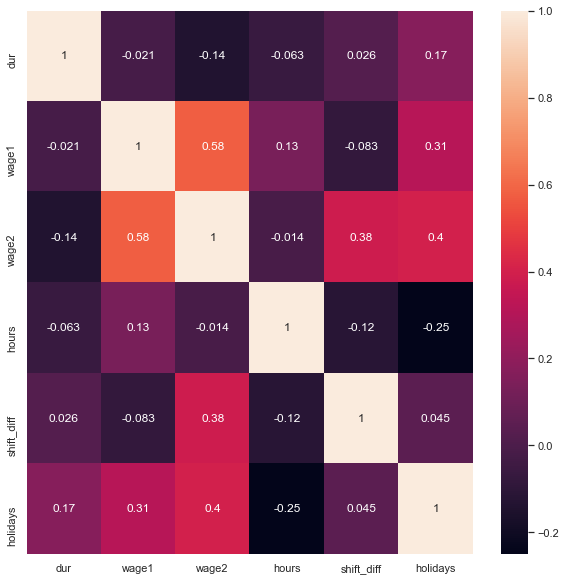

In [154]:
# Data-set high correlations
import matplotlib.pyplot as plt
import seaborn as sns

corrMatrix = labour_relations.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [155]:
labour_relations['class'].replace({"good": 1, "bad": 0}, inplace=True)

In [156]:
category_columns_labour = labour_relations.select_dtypes(include=['object']).columns
numerical_columns_labour= labour_relations.select_dtypes(exclude=['object']).columns

In [157]:
#Applying Onehotencoding and merging tables
labour_relations_clean= pd.DataFrame()

for col in category_columns_labour:
    
    val = [vals for vals in labour_relations[col].unique()]
    onehotcols = [col + '-' + str(s) for s in val]
    dummies_train = pd.get_dummies(labour_relations[col], prefix=col)
    labour_relations_clean= pd.concat([labour_relations_clean , dummies_train], axis=1)
    
labour_relations_cleans = pd.concat([labour_relations_clean,labour_relations[numerical_columns_labour]], axis = 1)
labour_relations_cleans.head()

,pension_empl_contr,pension_none,pension_ret_allw,pension_unknown,educ_allw_no,educ_allw_unknown,educ_allw_yes,vacation_average,vacation_below average,vacation_generous,...,empl_hplan_half,empl_hplan_none,empl_hplan_unknown,dur,wage1,wage2,hours,shift_diff,holidays,class
0,0,0,0,1,0,1,0,1,0,0,...,0,0,1,1.000000,5.000000,3.913333,40.0,2.000000,11.0,1
1,0,0,1,0,0,0,1,0,1,0,...,0,0,0,2.000000,4.500000,5.800000,35.0,4.583333,11.0,1
2,1,0,0,0,0,1,0,0,0,1,...,1,0,0,2.102564,3.620513,3.913333,38.0,5.000000,11.0,1
3,0,0,0,1,0,0,1,0,1,0,...,0,0,1,3.000000,3.700000,4.000000,40.0,4.583333,11.0,1
4,0,0,0,1,0,1,0,1,0,0,...,1,0,0,3.000000,4.500000,4.500000,40.0,4.583333,12.0,1


In [158]:
labour_relations_cleans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40 entries, 0 to 39
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   pension_empl_contr      40 non-null     uint8  
 1   pension_none            40 non-null     uint8  
 2   pension_ret_allw        40 non-null     uint8  
 3   pension_unknown         40 non-null     uint8  
 4   educ_allw_no            40 non-null     uint8  
 5   educ_allw_unknown       40 non-null     uint8  
 6   educ_allw_yes           40 non-null     uint8  
 7   vacation_average        40 non-null     uint8  
 8   vacation_below average  40 non-null     uint8  
 9   vacation_generous       40 non-null     uint8  
 10  lngtrm_disabil_no       40 non-null     uint8  
 11  lngtrm_disabil_unknown  40 non-null     uint8  
 12  lngtrm_disabil_yes      40 non-null     uint8  
 13  dntl_ins_full           40 non-null     uint8  
 14  dntl_ins_half           40 non-null     uint

In [159]:
# slitting X and target variables

X_labour = labour_relations_cleans[labour_relations_cleans.columns[:-1]].values
y_labour = labour_relations_cleans['class'].values

In [160]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

logreg = LogisticRegression(max_iter=10000)
rfe = RFE(logreg)
rfe = rfe.fit(X_labour, y_labour)
print(rfe.support_)
print(rfe.ranking_)

[False  True False  True  True False  True False False  True  True  True
  True False False False False False False False False False  True  True
 False  True  True  True  True  True]
[ 9  1 15  1  1 10  1  4  2  1  1  1  1  7 14  5 13  8 12  3 16  6  1  1
 11  1  1  1  1  1]


In [161]:
from sklearn.preprocessing import MinMaxScaler

scaling = MinMaxScaler(feature_range=(-1,1)).fit(X_labour)
X_train_labour = scaling.transform(X_labour)

In [203]:
from sklearn.model_selection import RepeatedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score


cv=RepeatedKFold(n_splits=10,n_repeats=1,random_state=1)


data={"Kfold":["Cv-1","Cv-2","Cv-3","Cv-4","Cv-5","Cv-6","Cv-7","Cv-8","Cv-9","Cv-10"]}
table_acc=pd.DataFrame(data,columns=["Kfold"])
acc_score=[]
ac_score=[]
accuracies=[]

def main(X_train, y_train):
    classifiers = [
    KNeighborsClassifier(22),
    SVC(kernel = 'linear'),
    RandomForestClassifier()
    ]


    for clf in classifiers:
        name = clf.__class__.__name__
        print("\nModel classifier =  ",name)
        print('\n****Results****')
        model = Pipeline([('feature_selection', rfe), ('Classifier', clf)])

        clfN=cross_val_score(model, X_train, y_train, cv=cv)
        table_acc[name]=clfN
        print("\nTen-fold cross validation score\n\n",clfN)
        acc=clfN.mean()
        accuracies.append(clfN)
        acc_score.append(name)
        ac_score.append(acc)
        print("\nMean Accuracy - ",acc)
        stdev=clfN.std()
        print("Standard Deviation: ",stdev) 
        print("\n------------------------------------------------------------------------------------------\n")
main(X_train_labour,y_labour)


Model classifier =   KNeighborsClassifier

****Results****

Ten-fold cross validation score

 [0.75 0.75 0.75 0.75 1.   1.   1.   1.   1.   0.75]

Mean Accuracy -  0.875
Standard Deviation:  0.125

------------------------------------------------------------------------------------------


Model classifier =   SVC

****Results****

Ten-fold cross validation score

 [1.   1.   0.75 1.   1.   1.   1.   1.   1.   0.75]

Mean Accuracy -  0.95
Standard Deviation:  0.09999999999999999

------------------------------------------------------------------------------------------


Model classifier =   RandomForestClassifier

****Results****

Ten-fold cross validation score

 [1.   1.   1.   1.   1.   1.   1.   1.   0.75 0.75]

Mean Accuracy -  0.95
Standard Deviation:  0.09999999999999999

------------------------------------------------------------------------------------------



In [204]:
df_labour=pd.DataFrame(columns=[acc_score])
df_labour.loc[" Labour Mean Accuracies"]=ac_score
df_labour

,KNeighborsClassifier,SVC,RandomForestClassifier
Labour Mean Accuracies,0.875,0.95,0.95


In [205]:
acc_score=[]
ac_score=[]

In [165]:
housing_votes=pd.read_excel(r"C:\Users\Barghavi\Desktop\notes\HM-2(ML)\house_votes.xlsx")
housing_votes.head()

,class_name,handicapped_infants,water_project_cost_sharing,adoption_of_the_budget_resolution,physician_fee_freeze,el_salvador_aid,religious_groups_in_schools,anti_satellite_test_ban,aid_to_nicaraguan_contras,mx_missile,immigration,synfuels_corporation_cutback,education_spending,superfund_right_to_sue,crime,duty_free_exports,export_administration_act_south_africa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [166]:
housing_votes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 17 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   class_name                              435 non-null    object
 1   handicapped_infants                     435 non-null    object
 2   water_project_cost_sharing              435 non-null    object
 3   adoption_of_the_budget_resolution       435 non-null    object
 4   physician_fee_freeze                    435 non-null    object
 5   el_salvador_aid                         435 non-null    object
 6   religious_groups_in_schools             435 non-null    object
 7   anti_satellite_test_ban                 435 non-null    object
 8   aid_to_nicaraguan_contras               435 non-null    object
 9   mx_missile                              435 non-null    object
 10  immigration                             435 non-null    object
 11  synfue

In [167]:
#Counting duplicate values and deleting them
print("NO of DUPLICATE Values",housing_votes.duplicated().sum())
housing_votes=pd.DataFrame.drop_duplicates(housing_votes)
print("After deleting dupluvates",housing_votes.duplicated().sum())

NO of DUPLICATE Values 93
After deleting dupluvates 0


In [168]:
for column in housing_votes.columns:
    print("COLUMN NAME = ",column)
    print(housing_votes[column].value_counts())
    print("\n-------------------------------------------\n")

COLUMN NAME =  class_name
democrat      225
republican    117
Name: class_name, dtype: int64

-------------------------------------------

COLUMN NAME =  handicapped_infants
n    181
y    149
?     12
Name: handicapped_infants, dtype: int64

-------------------------------------------

COLUMN NAME =  water_project_cost_sharing
y    159
n    145
?     38
Name: water_project_cost_sharing, dtype: int64

-------------------------------------------

COLUMN NAME =  adoption_of_the_budget_resolution
y    211
n    120
?     11
Name: adoption_of_the_budget_resolution, dtype: int64

-------------------------------------------

COLUMN NAME =  physician_fee_freeze
n    205
y    126
?     11
Name: physician_fee_freeze, dtype: int64

-------------------------------------------

COLUMN NAME =  el_salvador_aid
n    166
y    161
?     15
Name: el_salvador_aid, dtype: int64

-------------------------------------------

COLUMN NAME =  religious_groups_in_schools
y    221
n    110
?     11
Name: religious

In [169]:
# All the columns contains "?" as values, but it is Not unknown,yes and No
#So, lets convert it into a Values in all columns

housing_votes.replace(('?'), ("NONE"), inplace=True)
housing_votes.head()

,class_name,handicapped_infants,water_project_cost_sharing,adoption_of_the_budget_resolution,physician_fee_freeze,el_salvador_aid,religious_groups_in_schools,anti_satellite_test_ban,aid_to_nicaraguan_contras,mx_missile,immigration,synfuels_corporation_cutback,education_spending,superfund_right_to_sue,crime,duty_free_exports,export_administration_act_south_africa
0,republican,n,y,n,y,y,y,n,n,n,y,NONE,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NONE
2,democrat,NONE,y,y,NONE,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,NONE,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,NONE,y,y,y,y


In [170]:
housing_votes['class_name'] = np.where(housing_votes['class_name'] == 'democrat', 1, 0)

In [171]:
category_columns_votes = housing_votes.select_dtypes(include=['object']).columns
numerical_columns_votes= housing_votes.select_dtypes(exclude=['object']).columns

In [172]:
#Applying Onehotencoding and merging tables
housing_votes_clean= pd.DataFrame()

for col in category_columns_votes:
    
    val = [vals for vals in housing_votes[col].unique()]
    onehotcols = [col + '-' + str(s) for s in val]
    dummies_train = pd.get_dummies(housing_votes[col], prefix=col)
    housing_votes_clean= pd.concat([housing_votes_clean , dummies_train], axis=1)
    
housing_votes_clean = pd.concat([housing_votes_clean,housing_votes[numerical_columns_votes]], axis = 1)
housing_votes_clean.head()

,handicapped_infants_NONE,handicapped_infants_n,handicapped_infants_y,water_project_cost_sharing_NONE,water_project_cost_sharing_n,water_project_cost_sharing_y,adoption_of_the_budget_resolution_NONE,adoption_of_the_budget_resolution_n,adoption_of_the_budget_resolution_y,physician_fee_freeze_NONE,...,crime_NONE,crime_n,crime_y,duty_free_exports_NONE,duty_free_exports_n,duty_free_exports_y,export_administration_act_south_africa_NONE,export_administration_act_south_africa_n,export_administration_act_south_africa_y,class_name
0,0,1,0,0,0,1,0,1,0,0,...,0,0,1,0,1,0,0,0,1,0
1,0,1,0,0,0,1,0,1,0,0,...,0,0,1,0,1,0,1,0,0,0
2,1,0,0,0,0,1,0,0,1,1,...,0,0,1,0,1,0,0,1,0,1
3,0,1,0,0,0,1,0,0,1,0,...,0,1,0,0,1,0,0,0,1,1
4,0,0,1,0,0,1,0,0,1,0,...,0,0,1,0,0,1,0,0,1,1


In [173]:
housing_votes_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 342 entries, 0 to 434
Data columns (total 49 columns):
 #   Column                                       Non-Null Count  Dtype
---  ------                                       --------------  -----
 0   handicapped_infants_NONE                     342 non-null    uint8
 1   handicapped_infants_n                        342 non-null    uint8
 2   handicapped_infants_y                        342 non-null    uint8
 3   water_project_cost_sharing_NONE              342 non-null    uint8
 4   water_project_cost_sharing_n                 342 non-null    uint8
 5   water_project_cost_sharing_y                 342 non-null    uint8
 6   adoption_of_the_budget_resolution_NONE       342 non-null    uint8
 7   adoption_of_the_budget_resolution_n          342 non-null    uint8
 8   adoption_of_the_budget_resolution_y          342 non-null    uint8
 9   physician_fee_freeze_NONE                    342 non-null    uint8
 10  physician_fee_freeze_n    

In [174]:
# slitting X and target variables

X_votes = housing_votes_clean[housing_votes_clean.columns[:-1]].values
y_votes = housing_votes_clean['class_name'].values

In [175]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

logreg = LogisticRegression(max_iter=10000)
rfe = RFE(logreg)
rfe = rfe.fit(X_votes, y_votes)
print(rfe.support_)
print(rfe.ranking_)

[False False False  True False  True False  True  True False  True  True
 False  True  True False False  True False  True  True  True  True False
 False  True  True False  True  True False  True  True  True  True False
  True False False False False False False False  True False False  True]
[20  5 19  1 13  1 18  1  1  8  1  1 16  1  1 25  3  1 24  1  1  1  1 14
  9  1  1 23  1  1 11  1  1  1  1 15  1 22 10 17  4 21 12  2  1  7  6  1]


In [176]:
from sklearn.preprocessing import MinMaxScaler

scaling = MinMaxScaler(feature_range=(-1,1)).fit(X_votes)
X_train_votes = scaling.transform(X_votes)

In [206]:
main(X_train_votes,y_votes)


Model classifier =   KNeighborsClassifier

****Results****

Ten-fold cross validation score

 [0.82857143 0.88571429 1.         0.94117647 1.         0.94117647
 0.97058824 0.94117647 0.94117647 0.88235294]

Mean Accuracy -  0.9331932773109244
Standard Deviation:  0.05134618820326818

------------------------------------------------------------------------------------------


Model classifier =   SVC

****Results****

Ten-fold cross validation score

 [0.85714286 0.82857143 0.97058824 0.88235294 1.         0.94117647
 0.97058824 0.94117647 0.91176471 0.88235294]

Mean Accuracy -  0.9185714285714285
Standard Deviation:  0.05254278540122409

------------------------------------------------------------------------------------------


Model classifier =   RandomForestClassifier

****Results****

Ten-fold cross validation score

 [0.97142857 0.94285714 1.         0.88235294 1.         0.97058824
 1.         0.94117647 0.91176471 0.91176471]

Mean Accuracy -  0.9531932773109244
Standard Dev

In [207]:
df_votes=pd.DataFrame(columns=[acc_score])
df_votes.loc[" Housingvotes Mean Accuracies"]=ac_score
df_votes

,KNeighborsClassifier,SVC,RandomForestClassifier
Housingvotes Mean Accuracies,0.933193,0.918571,0.953193


In [208]:
acc_score=[]
ac_score=[]

In [180]:
iris = pd.read_excel(r"C:\Users\Barghavi\Desktop\notes\HM-2(ML)\iris.xlsx")  
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [181]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [182]:
print("IS there NULL Values")
iris.isnull().sum()

IS there NULL Values


sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
class           0
dtype: int64

In [183]:
#Counting duplicate values and deleting them
print("NO of DUPLICATE Values",iris.duplicated().sum())
iris=pd.DataFrame.drop_duplicates(iris)
iris.duplicated().sum()

NO of DUPLICATE Values 3


0

In [184]:
print(iris["class"].unique())

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [185]:
def convert_final(row, column_name):
    if row[column_name] == 'Iris-setosa': return 0
    elif row[column_name] == 'Iris-versicolor': return 1
    else: return 2

iris['class'] = iris.apply(lambda row: convert_final(row, 'class'),axis=1)

print(iris['class'].unique())

[0 1 2]


In [186]:
# slitting X and target variables

X_iris= iris[iris.columns[:-1]].values
y_iris = iris['class'].values

In [187]:
from sklearn.preprocessing import MinMaxScaler

scaling = MinMaxScaler(feature_range=(-1,1)).fit(X_iris)
X_train_iris = scaling.transform(X_iris)

In [209]:
main(X_train_iris,y_iris)


Model classifier =   KNeighborsClassifier

****Results****

Ten-fold cross validation score

 [0.93333333 0.93333333 0.93333333 0.93333333 1.         0.93333333
 1.         1.         1.         0.92857143]

Mean Accuracy -  0.9595238095238097
Standard Deviation:  0.0330772475939281

------------------------------------------------------------------------------------------


Model classifier =   SVC

****Results****

Ten-fold cross validation score

 [0.93333333 0.93333333 0.93333333 0.93333333 1.         0.93333333
 1.         1.         0.92857143 0.92857143]

Mean Accuracy -  0.9523809523809523
Standard Deviation:  0.031225897734771423

------------------------------------------------------------------------------------------


Model classifier =   RandomForestClassifier

****Results****

Ten-fold cross validation score

 [0.93333333 0.93333333 1.         0.86666667 0.93333333 0.93333333
 1.         1.         0.92857143 0.92857143]

Mean Accuracy -  0.9457142857142857
Standard Dev

In [210]:
df_iris=pd.DataFrame(columns=[acc_score])
df_iris.loc["Iris Mean Accuracies"]=ac_score
df_iris

,KNeighborsClassifier,SVC,RandomForestClassifier
Iris Mean Accuracies,0.959524,0.952381,0.945714


In [219]:
df_all=pd.DataFrame(columns=[acc_score])
df_all = pd.concat([df_labour,df_votes,df_iris], axis = 0)
df_all

,KNeighborsClassifier,SVC,RandomForestClassifier
Labour Mean Accuracies,0.875000,0.950000,0.950000
Housingvotes Mean Accuracies,0.933193,0.918571,0.953193
Iris Mean Accuracies,0.959524,0.952381,0.945714


In [220]:
df_balance

,KNeighborsClassifier,DecisionTreeClassifier,GaussianNB,RandomForestClassifier,ExtraTreesClassifier,SVC
balance-sampled,0.955286,0.962825,0.751812,0.984068,0.993194,0.94321


In [215]:
df_new=df_balance.drop(['DecisionTreeClassifier','GaussianNB','ExtraTreesClassifier'], axis = 1)
df_new

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:3936: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


,KNeighborsClassifier,RandomForestClassifier,SVC
balance-sampled,0.955286,0.984068,0.94321


In [221]:
from tabulate import tabulate

df_all = pd.concat([df_all,df_new], axis = 0)
df_all=df_all.round(3)
print(tabulate(df_all, headers=("KNeighborsClassifier","  SVC   ","RandomForestClassifier"), tablefmt='pretty'))

+------------------------------+----------------------+----------+------------------------+
|                              | KNeighborsClassifier |   SVC    | RandomForestClassifier |
+------------------------------+----------------------+----------+------------------------+
|    Labour Mean Accuracies    |        0.875         |   0.95   |          0.95          |
| Housingvotes Mean Accuracies |        0.933         |  0.953   |         0.919          |
|     Iris Mean Accuracies     |         0.96         |  0.946   |         0.952          |
|       balance-sampled        |        0.955         |  0.984   |         0.943          |
+------------------------------+----------------------+----------+------------------------+


In [222]:
print("Accuracy of 3 models in all 3 datasets\n",accuracies)

Accuracy of 3 models in all 3 datasets [array([0.75, 0.75, 0.75, 0.75, 1.  , 1.  , 1.  , 1.  , 1.  , 0.75]), array([1.  , 1.  , 0.75, 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 0.75]), array([1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 0.75, 0.75]), array([0.82857143, 0.88571429, 1.        , 0.94117647, 1.        ,
       0.94117647, 0.97058824, 0.94117647, 0.94117647, 0.88235294]), array([0.85714286, 0.82857143, 0.97058824, 0.88235294, 1.        ,
       0.94117647, 0.97058824, 0.94117647, 0.91176471, 0.88235294]), array([0.97142857, 0.94285714, 1.        , 0.88235294, 1.        ,
       0.97058824, 1.        , 0.94117647, 0.91176471, 0.91176471]), array([0.93333333, 0.93333333, 0.93333333, 0.93333333, 1.        ,
       0.93333333, 1.        , 1.        , 1.        , 0.92857143]), array([0.93333333, 0.93333333, 0.93333333, 0.93333333, 1.        ,
       0.93333333, 1.        , 1.        , 0.92857143, 0.92857143]), array([0.93333333, 0.93333333, 1.        , 0.86666667, 0.93333333,
      

In [223]:
import scikit_posthocs
scikit_posthocs.posthoc_nemenyi_friedman(accuracies)

,0,1,2,3,4,5,6,7,8,9
0,1.000000,0.900000,0.900000,0.900000,0.273159,0.900000,0.252106,0.713710,0.900000,0.785510
1,0.900000,1.000000,0.900000,0.900000,0.232504,0.900000,0.213691,0.665845,0.900000,0.833373
2,0.900000,0.900000,1.000000,0.857305,0.900000,0.900000,0.900000,0.900000,0.900000,0.111229
3,0.900000,0.900000,0.857305,1.000000,0.123217,0.900000,0.111229,0.498260,0.900000,0.900000
4,0.273159,0.232504,0.900000,0.123217,1.000000,0.900000,0.900000,0.900000,0.317623,0.001288
5,0.900000,0.900000,0.900000,0.900000,0.900000,1.000000,0.881240,0.900000,0.900000,0.178989
6,0.252106,0.213691,0.900000,0.111229,0.900000,0.881240,1.000000,0.900000,0.295079,0.001089
7,0.713710,0.665845,0.900000,0.498260,0.900000,0.900000,0.900000,1.000000,0.761574,0.019020
8,0.900000,0.900000,0.900000,0.900000,0.317623,0.900000,0.295079,0.761574,1.000000,0.737642
9,0.785510,0.833373,0.111229,0.900000,0.001288,0.178989,0.001089,0.019020,0.737642,1.000000


In [224]:
from scipy.stats import friedmanchisquare

# compare samples
stat, p = friedmanchisquare(accuracies[0],accuracies[3],accuracies[6],
                           accuracies[1],accuracies[4],accuracies[7],
                           accuracies[2],accuracies[5],accuracies[8])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
threshold = 0.05
if p > threshold:
    print('Probably Same distributions : fail to reject Null- Hypothesis')
else:
    print('Probably Different distributions : reject Null- Hypothesis')

Statistics=12.260, p=0.140
Probably Same distributions : fail to reject Null- Hypothesis


In [226]:
my_list=[]
for i in range(0, 10): 
    my_list.append([accuracies[0][i], accuracies[1][i], accuracies[2][i], 
                         accuracies[3][i], accuracies[4][i],accuracies[5][i], 
                         accuracies[6][i], accuracies[7][i],accuracies[8][i]])
    i=i+1
Names=(['labour_knn','labour_svc','labour_rf',
        'house_knn','house_svc','house_rf',
        'iris_knn','iris_svc','iris_rf'])
df_test=pd.DataFrame(my_list,columns=(Names))
df_test

,labour_knn,labour_svc,labour_rf,house_knn,house_svc,house_rf,iris_knn,iris_svc,iris_rf
0,0.75,1.00,1.00,0.828571,0.857143,0.971429,0.933333,0.933333,0.933333
1,0.75,1.00,1.00,0.885714,0.828571,0.942857,0.933333,0.933333,0.933333
2,0.75,0.75,1.00,1.000000,0.970588,1.000000,0.933333,0.933333,1.000000
3,0.75,1.00,1.00,0.941176,0.882353,0.882353,0.933333,0.933333,0.866667
4,1.00,1.00,1.00,1.000000,1.000000,1.000000,1.000000,1.000000,0.933333
5,1.00,1.00,1.00,0.941176,0.941176,0.970588,0.933333,0.933333,0.933333
6,1.00,1.00,1.00,0.970588,0.970588,1.000000,1.000000,1.000000,1.000000
7,1.00,1.00,1.00,0.941176,0.941176,0.941176,1.000000,1.000000,1.000000
8,1.00,1.00,0.75,0.941176,0.911765,0.911765,1.000000,0.928571,0.928571
9,0.75,0.75,0.75,0.882353,0.882353,0.911765,0.928571,0.928571,0.928571


In [228]:
# Calculating the ranks of the algorithms for each dataset. The value of p is multipled by -1
# because the rankdata method ranks from the smallest to the greatest performance values.
# Since we are considering AUC as our performance measure, we want larger values to be best ranked.
from scipy.stats import rankdata
ranks = np.array([rankdata(-p) for p in accuracies])
print("Ranks = \n\n",ranks)
print("------------------------\n")
# Calculating the average ranks.
average_ranks = np.mean(ranks, axis=0)
print("Average ranks : \n",average_ranks)

Ranks = 

 [[ 8.   8.   8.   8.   3.   3.   3.   3.   3.   8. ]
 [ 4.5  4.5  9.5  4.5  4.5  4.5  4.5  4.5  4.5  9.5]
 [ 4.5  4.5  4.5  4.5  4.5  4.5  4.5  4.5  9.5  9.5]
 [10.   8.   1.5  5.5  1.5  5.5  3.   5.5  5.5  9. ]
 [ 9.  10.   2.5  7.5  1.   4.5  2.5  4.5  6.   7.5]
 [ 4.   6.   2.  10.   2.   5.   2.   7.   8.5  8.5]
 [ 7.   7.   7.   7.   2.5  7.   2.5  2.5  2.5 10. ]
 [ 6.   6.   6.   6.   2.   6.   2.   2.   9.5  9.5]
 [ 5.5  5.5  2.  10.   5.5  5.5  2.   2.   8.5  8.5]]
------------------------

Average ranks : 
 [6.5        6.61111111 4.77777778 7.         2.94444444 5.05555556
 2.88888889 3.94444444 6.38888889 8.88888889]


In [229]:
print('\n'.join('{} average rank: {}'.format(a, r) for a, r in zip(Names, average_ranks)))

labour_knn average rank: 6.5
labour_svc average rank: 6.611111111111111
labour_rf average rank: 4.777777777777778
house_knn average rank: 7.0
house_svc average rank: 2.9444444444444446
house_rf average rank: 5.055555555555555
iris_knn average rank: 2.888888888888889
iris_svc average rank: 3.9444444444444446
iris_rf average rank: 6.388888888888889


In [231]:
# This method computes the critical difference for Nemenyi test with alpha=0.1.
# For some reason, this method only accepts alpha='0.05' or alpha='0.1'.
import Orange

from Orange.evaluation import compute_CD
cd = compute_CD(average_ranks,n=len(accuracies),
                        alpha='0.05',test='nemenyi')


In [232]:
print("critical Diffirencs : ",cd)

critical Diffirencs :  4.515361865044624


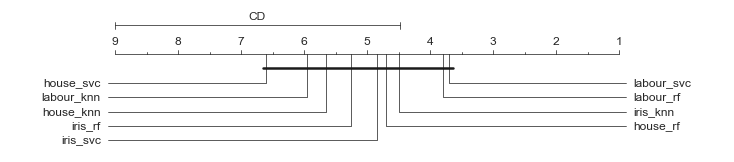

In [253]:
# This method generates the plot.
from Orange.evaluation import graph_ranks
graph_ranks(average_ranks,
names=Names,cd=cd,
width=10,
textspace=1.5,
reverse=True) 
plt.show()